# Project Wrangle and Analyze Data
### - by Amanda Krahn


## Introduction


## 1. Gathering
In this part, we'll gather 3 files:
- the WeRateDogs Twitter archive, twitter-archive-enhanced.csv, a file on hand
- the tweet image predictions, image-predictions.tsv, a file which will be downloaded programatically
- the tweet_json.txt file, which is the resulting data from twitter_api.py

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# file on hand - import csv into dataframe df_1
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# download image prediction file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [5]:
# import tsv file into dataframe df_2
df_2 = pd.read_csv(file_name, sep='\t')

In [6]:
# twitter api
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [7]:
# import json file into datafame df_3
df_3 = pd.read_json('tweet-json.txt', lines=True)

## 2. Assessing

We'll now check the data of the three dataframes and assess them visually and programmatically for quality and tidiness issues.
We'll define the issues, that we'll clean in the next part of this project.  
Let's start with the first dataframe:

In [8]:
# check the data of the first dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Following issues need to be corrected:
- datatype column "tweet_id" to str
- datatype column "timestamp" to timedata
- datatype columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" to str, but the columns will be removed because not needed.
- datatype columns "retweeted_status_timestamp object" to timedata, but will be removed because not needed.
- remove the rows which are retweets (Project instructions)

In [9]:
# dataframe sample
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Following issues need to be corrected:
- the 4 columns "doggo", "floofer", "pupper" and "puppo" should be grouped in one column because each variable shoud be in one column. Then delete the unnecessary columns "doggo", "floofer", "pupper" and "puppo"
- there are no Nan values in the dog stage columns, even though some entries are "None". We'll make no change here, as the grouping of the 4 stage columns will resolve this issue.

In [10]:
# check the most common values of column "name"
df_1['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Nico         1
Leonard      1
Vixen        1
Venti        1
William      1
Name: name, Length: 957, dtype: int64

Following issues need to be corrected:
- the most common entry is "None". This name should be removed.

In [11]:
# list all names
df_1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

When scrolling through the list of names, we can see that some entries are not names: for instance "a", 'by", "not".  
Apparently, the false name entries are all lowercase, let's check that:

In [12]:
# create a list of names, sort them in descending order to check all lowercase entries 
list_of_names = df_1['name'].unique().tolist()
list_of_names.sort(reverse=True)
list_of_names

['very',
 'unacceptable',
 'this',
 'the',
 'such',
 'space',
 'quite',
 'one',
 'old',
 'officially',
 'not',
 'my',
 'mad',
 'light',
 'life',
 'just',
 'infuriating',
 'incredibly',
 'his',
 'getting',
 'by',
 'an',
 'all',
 'actually',
 'a',
 'Zuzu',
 'Zooey',
 'Zoey',
 'Zoe',
 'Ziva',
 'Zeus',
 'Zeke',
 'Zeek',
 'Zara',
 'Yukon',
 'Yogi',
 'Yoda',
 'Wyatt',
 'Wishes',
 'Winston',
 'Winnie',
 'Winifred',
 'Wilson',
 'Willy',
 'Willow',
 'Willie',
 'William',
 'Willem',
 'Wiggles',
 'Wesley',
 'Watson',
 'Walter',
 'Wally',
 'Wallace',
 'Walker',
 'Waffles',
 'Wafer',
 'Vixen',
 'Vinscent',
 'Vinnie',
 'Vincent',
 'Vince',
 'Venti',
 'Ulysses',
 'Tyrus',
 'Tyrone',
 'Tyr',
 'Tycho',
 'Tupawc',
 'Tug',
 'Tuco',
 'Tucker',
 'Tuck',
 'Trooper',
 'Tripp',
 'Trip',
 'Trigger',
 'Trevith',
 'Traviss',
 'Travis',
 'Tove',
 'Torque',
 'Tonks',
 'Tommy',
 'Tom',
 'Toffee',
 'Todo',
 'Toby',
 'Tobi',
 'Tito',
 'Titan',
 'Tino',
 'Timofy',
 'Timmy',
 'Timison',
 'Timber',
 'Tilly',
 'Tiger',
 

Following issues need to be corrected:
- remove all name entries with wrong names

In [13]:
# check the values of column "rating_denominator"
df_1['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

Ususally, the rating denominator should remain 10. Let's have a look at the rows with a denominator other than 10:

In [14]:
# dataframe entries with denominator =! 10
df_1.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


Most of these rows seem to follow the usual rating rules, which imply a greater nominator than denominator. Let's check the text column for these rows:

In [15]:
df_1.query('rating_denominator != 10')['text'].tolist()

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This

It is apparent that some ratings with high denominators are due to the number of dogs on the picture. Other weird ratings are caused by some numerical information in the text (rating 1 / 2 => "This is an Albanian 3 1/2 legged" or 11/15 => 'started on 11/15/15').    

We'll solve this issue in two steps:
- remove the rows whose rating entries are wrong because of the numerical information in the text:  
    - Index 1598
    - Index 516
    - Index 342
- change rating values to the correct values (accourding to the text)
    - Index 2335 => 9/10
    - Index 1662 => 10/10
    - Index 1202 => 11/10
    - Index 1165 => 13/10
    - Index 1068 => 14/10
    - Index 313 => 13/10
- create a new column with proportion calculation, so the rows with high denominators can remain in the dataset   
  
Now, let's have a look at the numerators:

In [16]:
# numerator counts
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are apparently a lot of numerators with incomprehensible values. We should move on, clean the already defined issues (for instance the denominator issues) and reassess this numerator issue later on.

Let's now assess the second dataframe:

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Following issues need to be corrected:
- datatype column "tweet_id" to str

In [18]:
# dataframe sample
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# recognized images in p1
df_2['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

Following issues need to be corrected:
- create a new column containing the most likely dog breed
- replace '_' with a space in dog breed name and capitalize the names
  
Let us check if no dogs have been recognized on some pictures:

In [20]:
# dataframe entries where dogs haven't been recognized
filt = df_2[(~df_2['p1_dog']) & (~df_2['p2_dog']) & (~df_2['p3_dog'])]
filt

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


We could remove the rows where no dog breed has been recognized. But maybe these rows include interesting information (like the rate of recognized dogs), so let's keep them in the dataframe.
  
Let's now assess the third dataframe:

In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

Following issues need to be corrected:
- datatype column "id" to str
- change name column "id" to "tweet_id"

In [22]:
# dataframe sample
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Following issues need to be corrected:
- remove all columns except "id", "retweet_count" and "favorite_count"

## Summary Assessing
Following issues have been defined:

Dataframe 1:
- remove the rows which are retweets (Project instructions). Retweets can be selected through the column 'retweeted_status_id'
- change datatype column "tweet_id" to str (quality issue)
- change datatype column "timestamp" to timedata (quality issue)
- change datatype columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" to str, but the columns will be removed because not needed (quality issue)
- change datatype columns "retweeted_status_timestamp object" to timedata, but will be removed because not needed (quality issue)
- the 4 columns "doggo", "floofer", "pupper" and "puppo" should be grouped in one column because each variable should be in one column (tidiness issue)
- delete the unnecessary columns "doggo", "floofer", "pupper" and "puppo" 
- there is an issue with the dog names: some values seem to be incorrect ('None', 'a'...). We will check the entries and delete those that are not names (quality issue)
- remove the rows whose denominator rating entries are wrong because of the numerical information in the text (quality issue)
- change the rating values when information in text available (quality issue)
- create a new column with proportion calculation, so the rows with high denominators can remain in the dataset (tidiness issue)
- reassess the numerator column after the cleaning of the other issues has been done

Dataframe 2:
- change datatype column "tweet_id" to str (quality issue)
- create a new column containing the most likely dog breed (tidiness issue)
- replace '_' with a space in dog breed name and capitalize the names (quality issue)

Dataframe 3:
- change datatype column "id" to str (quality issue)
- change name column "id" to "tweet_id (quality issue) - This step is not absolutely necessary, but is carried out to standardize the column names
- remove all columns except "id", "retweet_count" and "favorite_count" (quality issue)  
  
After cleaning these issues, we'll merge all dataframes to one, because we have only one type of observational unit (tidiness issue).

## 3. Cleaning  
We'll go through all defined issues from the assessing part, clean these issues and test the results.  

Let's start with the cleaning steps for the first dataframe:

In [23]:
# create df_1 copy
df_1_clean = df_1.copy()

In [24]:
# remove the rows which are retweets (Project instructions)
df_1_clean.drop(index=df_1_clean[df_1_clean['retweeted_status_id'].notnull()].index, inplace=True)

# check if retweets are all deleted
df_1_clean[df_1_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
# change datatype column "tweet_id" to str
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

# check the datatype of column 'tweet_id'
df_1_clean['tweet_id'].dtype

dtype('O')

In [26]:
# change datatype column "timestamp" to datetime
df_1_clean['timestamp']= pd.to_datetime(df_1_clean['timestamp']) 

# check the datatype of column 'timestamp'
df_1_clean['timestamp'].dtype

datetime64[ns, UTC]

In [27]:
# remove columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'
df_1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                         'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

# check the remaining columns
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [28]:
# group the columns "doggo", "floofer", "pupper" and "puppo" into one column
# remove the 'None'-entries 
df_1_clean['doggo'].replace('None', '', inplace=True)
df_1_clean['floofer'].replace('None', '', inplace=True)
df_1_clean['pupper'].replace('None', '', inplace=True)
df_1_clean['puppo'].replace('None', '', inplace=True)

# create a new column 'dogstage'
df_1_clean['dogstage'] = df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo']

# check the values of the new column 'dogstage'
df_1_clean['dogstage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [29]:
# change entry of dogstages with several stage
df_1_clean.loc[df_1_clean['dogstage'] == 'doggopuppo', 'dogstage'] = 'duggo, puppo'
df_1_clean.loc[df_1_clean['dogstage'] == 'doggofloofer', 'dogstage'] = 'duggo, floofer'
df_1_clean.loc[df_1_clean['dogstage'] == 'doggopupper', 'dogstage'] = 'duggo, pupper'

# check the values of the new column 'dogstage'
df_1_clean['dogstage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'duggo, puppo',
       'duggo, floofer', 'duggo, pupper'], dtype=object)

In [30]:
# remove the columns  "doggo", "floofer", "pupper" and "puppo"
df_1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

# df_1_clean after change
df_1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [31]:
# cleaning steps for the name column:
# create list of lowercase names
lower_names = []
for name in list_of_names:
    if name[0].islower():
        lower_names.append(name)
lower_names

['very',
 'unacceptable',
 'this',
 'the',
 'such',
 'space',
 'quite',
 'one',
 'old',
 'officially',
 'not',
 'my',
 'mad',
 'light',
 'life',
 'just',
 'infuriating',
 'incredibly',
 'his',
 'getting',
 'by',
 'an',
 'all',
 'actually',
 'a']

In [32]:
# replace false names with Nan
df_1_clean.loc[df_1_clean['name'].isin(lower_names), 'name'] = ''
df_1_clean.loc[df_1_clean['name'] == 'None', 'name'] = ''

In [33]:
# check the list of names after change
list_of_names_new = df_1_clean['name'].unique().tolist()
list_of_names_new.sort(reverse=True)
list_of_names_new

['Zuzu',
 'Zooey',
 'Zoey',
 'Zoe',
 'Ziva',
 'Zeus',
 'Zeke',
 'Zeek',
 'Zara',
 'Yukon',
 'Yogi',
 'Yoda',
 'Wyatt',
 'Wishes',
 'Winston',
 'Winnie',
 'Winifred',
 'Wilson',
 'Willy',
 'Willow',
 'Willie',
 'William',
 'Willem',
 'Wiggles',
 'Wesley',
 'Watson',
 'Walter',
 'Wally',
 'Wallace',
 'Walker',
 'Waffles',
 'Wafer',
 'Vixen',
 'Vinscent',
 'Vinnie',
 'Vincent',
 'Vince',
 'Venti',
 'Ulysses',
 'Tyrus',
 'Tyrone',
 'Tyr',
 'Tycho',
 'Tupawc',
 'Tug',
 'Tuco',
 'Tucker',
 'Tuck',
 'Trooper',
 'Tripp',
 'Trip',
 'Trigger',
 'Trevith',
 'Traviss',
 'Travis',
 'Tove',
 'Torque',
 'Tonks',
 'Tommy',
 'Tom',
 'Toffee',
 'Todo',
 'Toby',
 'Tobi',
 'Tito',
 'Titan',
 'Tino',
 'Timofy',
 'Timmy',
 'Timison',
 'Timber',
 'Tilly',
 'Tiger',
 'Thumas',
 'Thor',
 'Theodore',
 'Theo',
 'Tessa',
 'Tess',
 'Terry',
 'Terrenth',
 'Terrance',
 'Tedrick',
 'Teddy',
 'Tedders',
 'Ted',
 'Tebow',
 'Taz',
 'Tayzie',
 'Tater',
 'Tassy',
 'Tanner',
 'Tango',
 'Taco',
 'Sweets',
 'Sweet',
 'Swagge

In [34]:
# change the rating nominator and denominator if information available in column text
df_1_clean.loc[313, ['rating_numerator', 'rating_denominator']] = [13, 10]
df_1_clean.loc[1068, ['rating_numerator', 'rating_denominator']] = [14, 10]
df_1_clean.loc[1165, ['rating_numerator', 'rating_denominator']] = [13, 10]
df_1_clean.loc[1202, ['rating_numerator', 'rating_denominator']] = [11, 10]
df_1_clean.loc[1662, ['rating_numerator', 'rating_denominator']] = [10, 10]
df_1_clean.loc[2335, ['rating_numerator', 'rating_denominator']] = [9, 10]

In [35]:
# remove rows with rating denominator where no information available in column text
df_1_clean.drop(index=516, inplace=True)
df_1_clean.drop(index=342, inplace=True)

In [36]:
# create a new column with rating proportion
df_1_clean['rating_prop'] = df_1_clean['rating_numerator']/df_1_clean['rating_denominator']
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogstage',
       'rating_prop'],
      dtype='object')

Now, let's proceed the cleaning steps for the second dataframe:

In [37]:
# create df_2 copy
df_2_clean = df_2.copy()

In [38]:
# change datatype column "tweet_id" to str
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

# check the datatype of column 'tweet_id'
df_2_clean['tweet_id'].dtype

dtype('O')

In [39]:
# create a new column 'dog_breed' containing the most likely dog breed
df_2_clean['dog_breed'] = (np.where(
        df_2_clean['p1_dog'], 
        df_2_clean['p1'], 
        np.where(df_2_clean['p2_dog'], df_2_clean['p2'], np.where(df_2_clean['p3_dog'], df_2_clean['p3'], 'Not a dog'))))
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [40]:
# replace '_' with a space in dog breed name and capitalize it
df_2_clean['dog_breed'] = df_2_clean['dog_breed'].str.replace('_', ' ').str.title()
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher


Let's continue with the cleaning steps for the third dataframe:

In [41]:
# create df_3 copy
df_3_clean = df_3.copy()

In [42]:
# change datatype column "tweet_id" to str
df_3_clean['id'] = df_3_clean['id'].astype(str)

# check the datatype of column 'tweet_id'
df_3_clean['id'].dtype

dtype('O')

In [43]:
# change name column "id" to "tweet_id" 
df_3_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)
df_3_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [44]:
# remove all columns except "id", "retweet_count" and "favorite_count"
df_3_clean.drop(columns=['created_at', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'], inplace=True)
df_3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

Now that all 3 dataframe are cleaned, let's merge them to one single dataframe:

In [45]:
# merge all 3 dataframes to one
df_temp = pd.merge(df_1_clean, df_2_clean, on='tweet_id', how='inner')
df_clean = pd.merge(df_temp, df_3_clean, on='tweet_id', how='inner')
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,rating_prop,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,1.3,...,False,bagel,0.085851,False,banana,0.076110,False,Not A Dog,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,1.3,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,1.2,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,1.3,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador Retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,1.2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Basset,9774,41048


In [46]:
# reassess column rating_numerator - ckeck for unconsistent data
df_clean.query('rating_numerator > 14')['text'].tolist() # numerator above 14 might be faulty

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera i

In [47]:
# Query dataframe 
df_clean.query('rating_numerator > 14')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogstage,rating_prop,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,retweet_count,favorite_count
323,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,,,1.2,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,West Highland White Terrier,3716,13518
502,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,7.5,...,True,Persian_cat,0.122978,False,chow,0.102654,True,Pomeranian,7069,20296
552,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,2.7,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,Clumber,1885,7320
661,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,,,1.1,...,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,Labrador Retriever,2539,5316
725,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,,177.6,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,Not A Dog,2772,5569
847,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,,,1.2,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,Not A Dog,1434,4196
945,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,,,1.1,...,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,Golden Retriever,829,3062
969,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,,,1.0,...,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,Soft-Coated Wheaten Terrier,636,2529
987,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,,,0.9,...,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,Borzoi,721,2634
1053,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,,,1.2,...,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,Great Pyrenees,1028,3201


We can find here 5 ratings, that needed to be corrected:
- Index 502 => nominator should be changed to 9.75
- Index 552 => nominator should be changed to 11.27
- Index 725 => this is an outlier. The nominator 1776 refers to the year of the declaration of Independence of the United States => row will be removed
- Index 1373 => nominator should be changed to 11.26
- Index 1717 => this is an outlier. The nominator 420 probably refers to the "four-twenty", a cannabis culture slang (https://en.wikipedia.org/wiki/420_(cannabis_culture)) => row will be removed

In [48]:
# change the rating numenator according to the information available in column text
df_clean.loc[502, 'rating_numerator'] = 9.75
df_clean.loc[552, 'rating_numerator'] = 11.27
df_clean.loc[1373, 'rating_numerator'] = 11.26

# remove rows with outlier as numerator 
df_clean.drop(index=725, inplace=True)
df_clean.drop(index=1717, inplace=True)

# recalculate the rating_prop column after the numerator changes
df_clean['rating_prop'] = df_clean['rating_numerator']/df_clean['rating_denominator']

As we now have a rating proportion column, we could remove the colums 'rating_numerator' and 'rating_denominator'.
We also could remove the columns  'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' because we created the dog_breed column.  
Let's take those steps:

In [49]:
# remove the unnecessary columns
df_clean.drop(columns=['rating_numerator', 'rating_denominator',  'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dogstage,rating_prop,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not A Dog,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,9774,41048


In [50]:
# store the cleaned dataframe to csv file
df_clean.to_csv('twitter_archive_master.csv') 

## 4. Analysis and visualization

In this analysis, we'll try to find some characteristics of tweets that have a high count of retweets and/or favorite. To do this, we'll answer these questions:

- How many pictures haven't been recognized as dog pictures? What is the mean favorite counts / retweet counts of these pictures? What is the mean favorite counts / retweet counts of the dog pictures?
- Do dog whose name is mentioned in the text, get more favorite counts / retweet counts? 
- Which dog stage gets the most retweet and favorite counts?  
  
Let's start with our first analysis: How many pictures haven't been recognized as dog pictures? what is the mean favorite counts / retweet counts of these pictures? What is the mean favorite counts / retweet counts of the dog pictures?

In [51]:
# number of not recognized pictures - proportion of pictures where dogs haven't been recognized
df_clean.query('dog_breed == "Not A Dog"').shape[0], df_clean.query('dog_breed == "Not A Dog"').shape[0]/df_clean.query('dog_breed != "Not A Dog"').shape[0]

(306, 0.18160237388724035)

In [52]:
# mean values for posts with "not A Dog" pictures
df_clean.query('dog_breed == "Not A Dog"').mean()[1:]

rating_prop          0.900327
img_num              1.133987
retweet_count     2484.147059
favorite_count    7050.640523
dtype: float64

In [53]:
# mean values for posts with dog pictures
df_clean.query('dog_breed != "Not A Dog"').mean()[1:]

rating_prop          1.083637
img_num              1.216024
retweet_count     2817.807715
favorite_count    9235.071810
dtype: float64

We can see here, that tweets with dog pictures get more likes (9235) and retweets (2817) in average as tweets with pictures where no dog has been recognized (7050 / 2484).  
  
Now, let's take a look at our second question: Do dog whose name is mentioned in the text, get more favorite counts / retweet counts? 

In [54]:
# mean values for posts where dognames haven't been mentioned
df_clean.query('name == ""').mean()[1:]

rating_prop          1.023524
img_num              1.188180
retweet_count     2795.132193
favorite_count    7820.824261
dtype: float64

In [55]:
# mean values for posts where dognames have been mentioned
df_clean.query('name != ""').mean()[1:]

rating_prop          1.070699
img_num              1.210682
retweet_count     2752.882047
favorite_count    9413.799703
dtype: float64

Apparently, tweets where the dog's name has been mentioned are more likely to get more likes (9413) and retweets (2752) in average than tweets where the dog's name hasn't been mentioned (7820 / 2795).  
  
Finally, let's move on to our last question: Which dog stage gets the most retweet and favorite counts? 

In [56]:
# Mean values for the different dog stages
dog_stage = df_clean.groupby('dogstage').mean()[['retweet_count', 'favorite_count']]
dog_stage

,retweet_count,favorite_count
dogstage,,
,2577.353709,8482.456973
doggo,7125.698413,19356.380952
"duggo, floofer",3433.000000,17169.000000
"duggo, pupper",4083.444444,12533.111111
"duggo, puppo",19196.000000,47844.000000
floofer,4968.714286,13206.000000
pupper,2363.581281,7197.738916
puppo,6473.954545,21582.090909


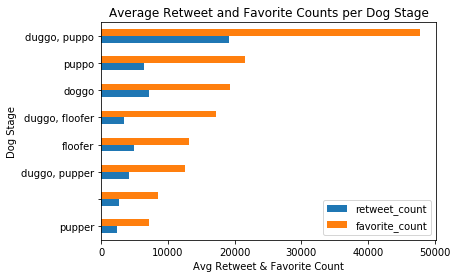

In [57]:
# plot 
dog_stage.sort_values('favorite_count').plot.barh(title='Average Retweet and Favorite Counts per Dog Stage')
plt.xlabel('Avg Retweet & Favorite Count')
plt.ylabel('Dog Stage');

In [58]:
# entries for the dog stage duggo, puppo
df_clean.query('dogstage == "duggo, puppo"')

,tweet_id,timestamp,source,text,expanded_urls,name,dogstage,rating_prop,jpg_url,img_num,dog_breed,retweet_count,favorite_count
148,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,,"duggo, puppo",1.3,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,Flat-Coated Retriever,19196,47844


One dog, classified as a 'duggo, puppo' got on average the most retweet and like counts. It's interesting to see that mentions of a dog stage get more likes and retweets than posts that do not mention a dog(except for pupper).  
  
In conclusion, to be successful in terms of likes and retweets, a tweet must have the following characteristics:
- great recognizable dog picture
- mention of the dog's name
- mention of the dog stage

And do not forget: They're Good Dogs Brent!